== Introduction ==

This project uses TF1

In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [2]:
import sys
sys.path.append("c:/workspace/tf_unet")
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

In [3]:
nx = 572
ny = 572


In [4]:
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)

In [5]:
x_test, y_test = generator(1)

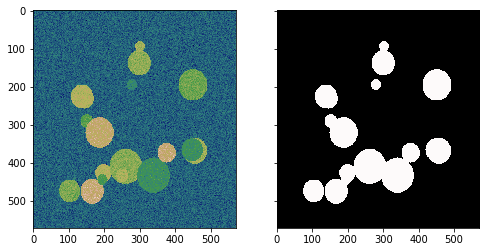

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")

In [7]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

2019-10-14 13:03:25,513 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [8]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [9]:
path = trainer.train(generator, "./unet_trained", training_iters=32, epochs=10, display_step=2)

2019-10-14 13:03:32,522 Removing 'C:\workspace\deeplearning\unet_sample\prediction'
2019-10-14 13:03:32,524 Removing 'C:\workspace\deeplearning\unet_sample\unet_trained'
2019-10-14 13:03:32,525 Allocating 'C:\workspace\deeplearning\unet_sample\prediction'
2019-10-14 13:03:32,527 Allocating 'C:\workspace\deeplearning\unet_sample\unet_trained'
2019-10-14 13:03:40,605 Verification error= 83.6%, loss= 0.7044
2019-10-14 13:03:41,211 Start optimization
2019-10-14 13:03:45,775 Iter 0, Minibatch Loss= 0.6670, Training Accuracy= 0.8080, Minibatch error= 19.2%
2019-10-14 13:03:46,584 Iter 2, Minibatch Loss= 0.5694, Training Accuracy= 0.8856, Minibatch error= 11.4%
2019-10-14 13:03:47,401 Iter 4, Minibatch Loss= 0.5529, Training Accuracy= 0.8146, Minibatch error= 18.5%
2019-10-14 13:03:48,216 Iter 6, Minibatch Loss= 0.4685, Training Accuracy= 0.8623, Minibatch error= 13.8%
2019-10-14 13:03:49,017 Iter 8, Minibatch Loss= 0.4335, Training Accuracy= 0.8612, Minibatch error= 13.9%
2019-10-14 13:03:49

2019-10-14 13:04:45,091 Iter 136, Minibatch Loss= 0.2986, Training Accuracy= 0.7718, Minibatch error= 22.8%
2019-10-14 13:04:45,886 Iter 138, Minibatch Loss= 0.2306, Training Accuracy= 0.8319, Minibatch error= 16.8%
2019-10-14 13:04:46,667 Iter 140, Minibatch Loss= 0.2453, Training Accuracy= 0.8387, Minibatch error= 16.1%
2019-10-14 13:04:47,454 Iter 142, Minibatch Loss= 0.1746, Training Accuracy= 0.8506, Minibatch error= 14.9%
2019-10-14 13:04:48,262 Iter 144, Minibatch Loss= 0.1688, Training Accuracy= 0.8297, Minibatch error= 17.0%
2019-10-14 13:04:49,070 Iter 146, Minibatch Loss= 0.2316, Training Accuracy= 0.9535, Minibatch error= 4.6%
2019-10-14 13:04:49,861 Iter 148, Minibatch Loss= 0.1663, Training Accuracy= 0.9608, Minibatch error= 3.9%
2019-10-14 13:04:50,645 Iter 150, Minibatch Loss= 0.3887, Training Accuracy= 0.9291, Minibatch error= 7.1%
2019-10-14 13:04:51,465 Iter 152, Minibatch Loss= 0.1566, Training Accuracy= 0.9695, Minibatch error= 3.1%
2019-10-14 13:04:52,305 Iter 154

2019-10-14 13:05:47,921 Iter 280, Minibatch Loss= 0.1733, Training Accuracy= 0.9400, Minibatch error= 6.0%
2019-10-14 13:05:48,721 Iter 282, Minibatch Loss= 0.0910, Training Accuracy= 0.9679, Minibatch error= 3.2%
2019-10-14 13:05:49,521 Iter 284, Minibatch Loss= 0.1010, Training Accuracy= 0.9690, Minibatch error= 3.1%
2019-10-14 13:05:50,312 Iter 286, Minibatch Loss= 0.0661, Training Accuracy= 0.9842, Minibatch error= 1.6%
2019-10-14 13:05:50,586 Epoch 8, Average loss: 0.1321, learning rate: 0.1327
2019-10-14 13:05:51,062 Verification error= 2.7%, loss= 0.0937
2019-10-14 13:05:52,239 Iter 288, Minibatch Loss= 0.0645, Training Accuracy= 0.9830, Minibatch error= 1.7%
2019-10-14 13:05:53,032 Iter 290, Minibatch Loss= 0.0795, Training Accuracy= 0.9736, Minibatch error= 2.6%
2019-10-14 13:05:53,850 Iter 292, Minibatch Loss= 0.1345, Training Accuracy= 0.9580, Minibatch error= 4.2%
2019-10-14 13:05:54,710 Iter 294, Minibatch Loss= 0.0975, Training Accuracy= 0.9702, Minibatch error= 3.0%
2019

In [10]:
x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.ckpt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-10-14 13:08:24,303 Restoring parameters from ./unet_trained/model.ckpt
2019-10-14 13:08:24,401 Model restored from file: ./unet_trained/model.ckpt


FileNotFoundError: [Errno 2] No such file or directory: '../docs/toy_problem.png'

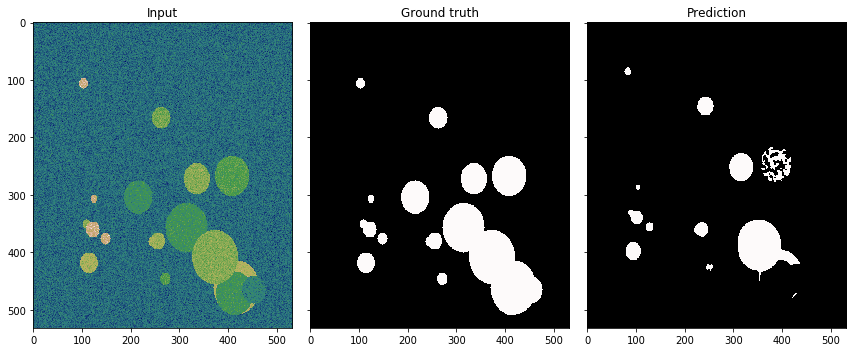

In [11]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/toy_problem.png")